# Dağılım Grafikleri

* **Sutun grafikleri elimizdeki kategorik degişkenleri görsellestirmek için kullanılır.**

## Barplot

**Veri Seti Hikayesi**

price: dolar cinsinde fiyat ( 326– 18,823)

carat: ağırlık (0.2–5.01)

cut: kalite (Fair, Good, Very Good, Premium, Ideal)

color: renk (from J (worst) to D (best))

clarity: temizliği, berraklığı (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x: length in mm (0–10.74)

y: width in mm (0–58.9)

z: depth in mm (0–31.8)

depth: toplam derinlik yüzdesi = z / mean(x, y) = 2 * z / (x + y) (43–79)

table: elmasın en geniş noktasına göre genişliği (43–95)

In [48]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Veri Setine Hızlı Bakıs**

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [51]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [52]:
df["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [53]:
df["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

* Kategorik değişkenlerin tipini sıralı(ordered) bir sekilde programa tanıtacagız.

In [54]:
# Ordinal Tanımlama

In [55]:
from pandas.api.types import CategoricalDtype

In [56]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [58]:
# Belirtilmiş olan df içerisindeki kategorik degişkenin tipini category değişkene donustur ve bunu sıralı yap

In [57]:
df.cut = df.cut.astype(CategoricalDtype(ordered = True))

In [59]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [60]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

* Sıramala veri seti hikayesindeki sıralamaya uygun değil. Eger bu değişken sıralıysa bunu programa belirtmek lazım yoksa kendisi sıralama yaptıgında veri setinin yapısına uygun olmayacak sekılde yapar

In [61]:
# peki bu dogru bir sekılde nasıl yapılır ?

In [62]:
cut_kategoriler = ["Fair","Good","Very Good","Premium","Ideal"]

In [63]:
df.cut = df.cut.astype(CategoricalDtype(categories = cut_kategoriler, ordered = True))

In [64]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

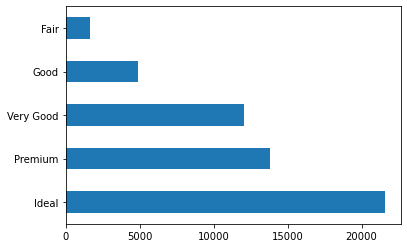

In [65]:
df["cut"].value_counts().plot.barh();

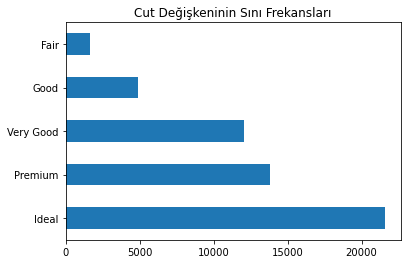

In [66]:
df["cut"].value_counts().plot.barh().set_title("Cut Değişkeninin Sını Frekansları");

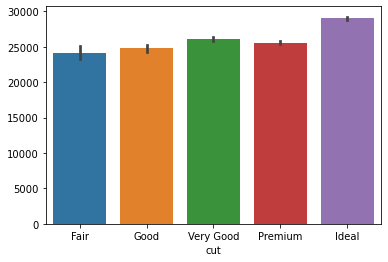

In [67]:
sns.barplot(x = "cut" , y = df.cut.index, data = df);

## Çaprazlamalar

In [68]:
import seaborn as sns
from pandas.api.types import CategoricalDtype
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
cut_kateoriler = ["Fair","Good","Very Good","Premium","Ideal"]
df.cut = df.cut.astype(CategoricalDtype(categories = cut_kategoriler, ordered = True))
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


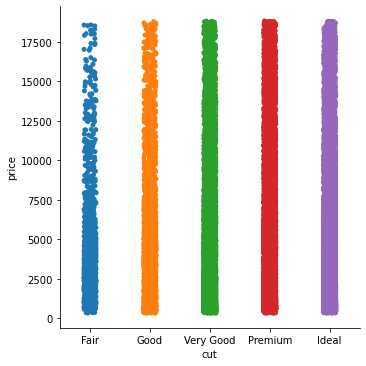

In [69]:
sns.catplot(x = "cut", y = "price", data = df);

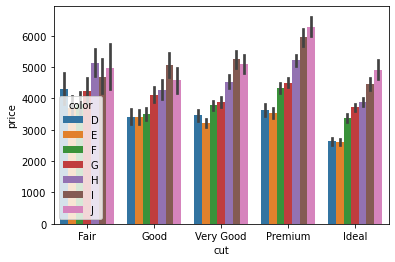

In [70]:
sns.barplot(x = "cut", y = "price", hue = "color", data = df);

In [71]:
df.groupby(["cut", "color"])["price"].mean()

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

## Histogram ve Yoğunluk Grafiği

* Sayısal değişkenlerin dağılımı için kullanılan veri gorsellestırme teknikleridir

In [72]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


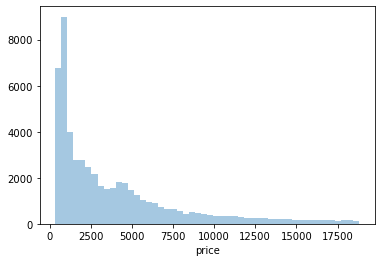

In [73]:
sns.distplot(df.price, kde = False);

* Histogram elimizdeki sayısal değişkenin değerlerini belirli aralıklara boler ve belirli aralıktaki ilgili değerlerin gözlem ve frekanslarını yansıtır

In [74]:
# Bu grafikten price degikeninin dagılımına bakıldıgında
# bu grafiğin yayvan oldugu yani standart sapmasının cok kucuk olmadıgı 
# carpık oldugu (iki tepeli bir yapı var, medyan ile ortalaması arasında fark oldugu çıkartılabilir

In [75]:
df["price"].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

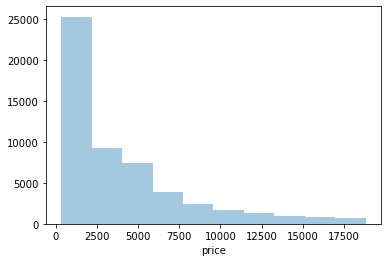

In [76]:
sns.distplot(df.price, bins = 10, kde = False);

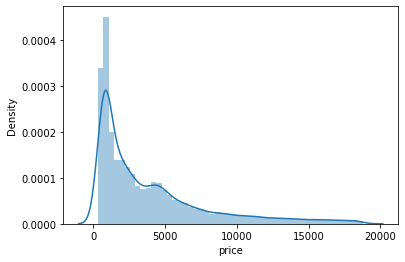

In [77]:
sns.distplot(df.price);

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


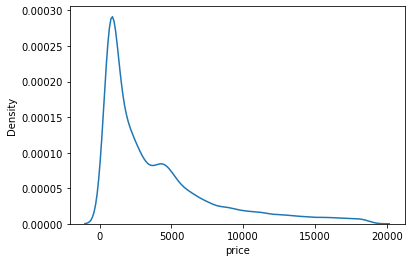

In [78]:
sns.distplot(df.price, hist = False);

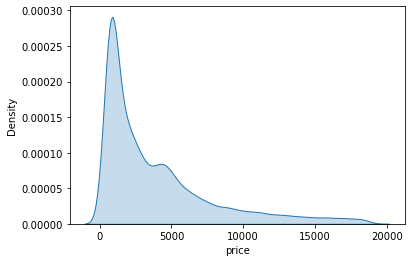

In [79]:
sns.kdeplot(df.price, shade  = True);

## Histogram ve Yogunluk Çaprazlamalar

In [80]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


* **FacetGrid()** = Grafik üzerine eklenen boyutları bölerek gostermek için kullanılır.

* **add_legend()** = üzerine eklediğimiz cut kategorik değişkeninin kategori bilgilerini eklemek için kullanıldı

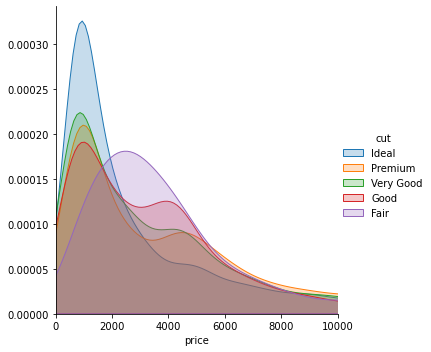

In [81]:
(sns.
 FacetGrid(df,
              hue = "cut",
              height = 5, 
          xlim = (0, 10000))
 .map(sns.kdeplot, "price", shade = True )
 .add_legend()
);

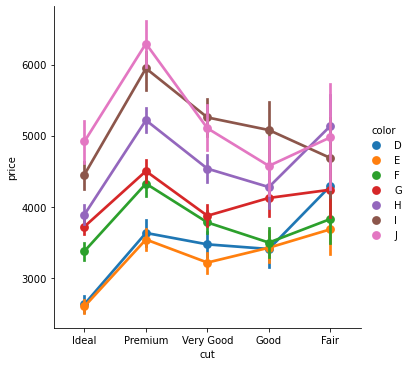

In [82]:
sns.catplot(x = "cut", y = "price", hue = "color", kind = "point", data =df);

## Boxplot (Kutu Grafiği)

* Sayısal değişkenler için kullanılır. Medyan ve dağılımları da gosterir.

In [83]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [84]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [85]:
df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [86]:
df["smoker"].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [87]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [88]:
df["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

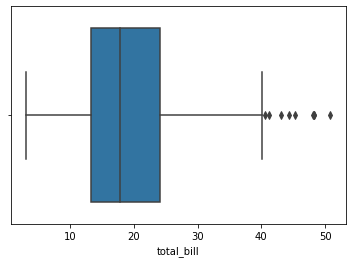

In [89]:
sns.boxplot(x = df["total_bill"]);

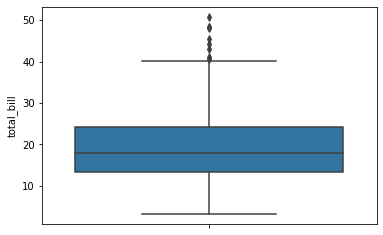

In [90]:
sns.boxplot(y = df["total_bill"], orient = "v");

## Boxplot Çaprazlamalar

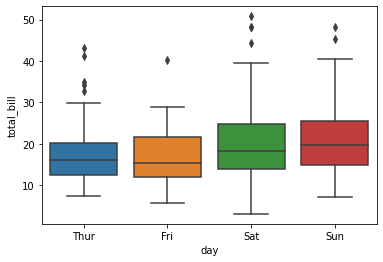

In [91]:
sns.boxplot(x = "day", y = "total_bill", data = df);

In [93]:
# Sabah mı akşam mı daha fazla para kazanılıyor ?

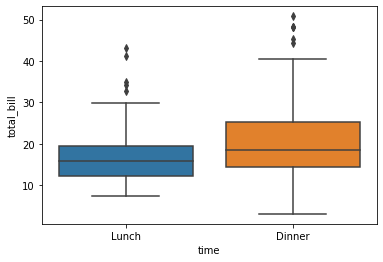

In [94]:
sns.boxplot( x = "time", y = "total_bill", data = df);

In [95]:
# Yemeğe gelen grup sayısı ile kazanc dogru orantılı mı ?

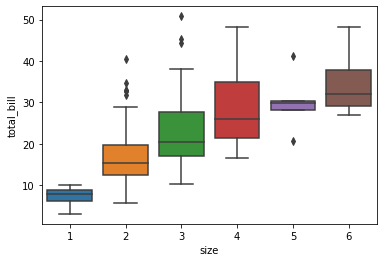

In [96]:
sns.boxplot(x = "size", y ="total_bill", data = df);

In [97]:
# Günlere ve cinsiyete gore dagılım

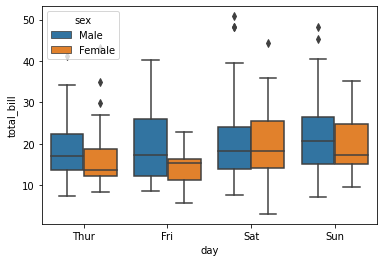

In [98]:
sns.boxplot(x = "day", y = "total_bill", hue = "sex", data = df);

## Violin Grafiğinin Oluşturulması

In [99]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


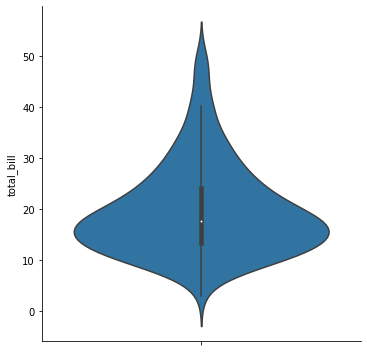

In [100]:
sns.catplot(y = "total_bill", kind = "violin", data = df);

## Violin ile Çaprazlamalar

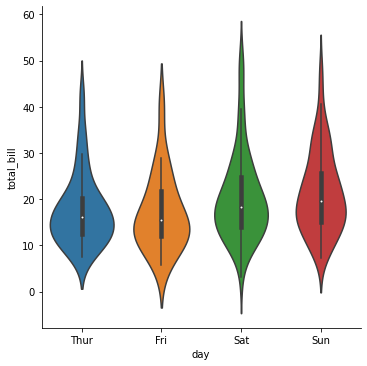

In [101]:
sns.catplot(x = "day", y = "total_bill" , kind = "violin", data = df);

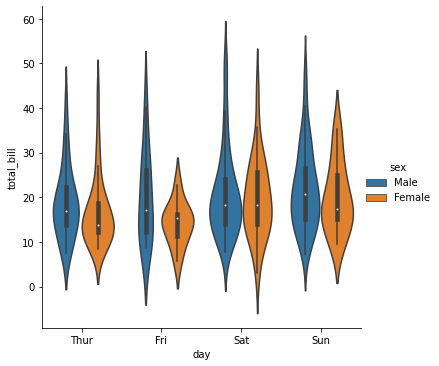

In [102]:
sns.catplot(x = "day", y = "total_bill", hue = "sex", kind = "violin", data = df);

## Korelasyon Grafikleri

* **Korelasyon** = Değişkenler arasndaki ilişkiyi ifade eden istatistik ifadedir.
* **Scatterplot** = Sayısal değişkenler arasındaki ilişkiyi gosteririr.

## Scatterplot (Saçılım Grafiği)

total_bill: yemeğin toplam fiyatı (bahşiş ve vergi dahil)

tip: bahşiş

sex: ücreti ödeyen kişinin cinsiyeti (0=male, 1=female)

smoker: grupta sigara içen var mı? (0=No, 1=Yes)

day: gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)

time: ne zaman? (0=Day, 1=Night)

size: grupta kaç kişi var?

In [103]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


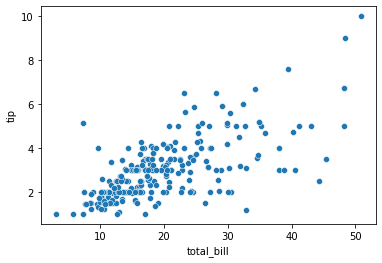

In [104]:
sns.scatterplot(x ="total_bill", y = "tip", data = df);

## Korelasyon Çaprazlamalar

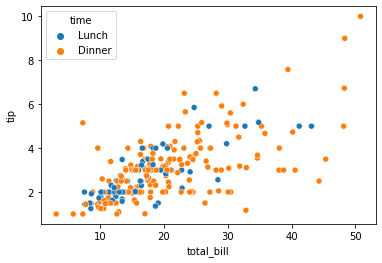

In [105]:
sns.scatterplot(x ="total_bill", y = "tip",hue = "time", data = df);

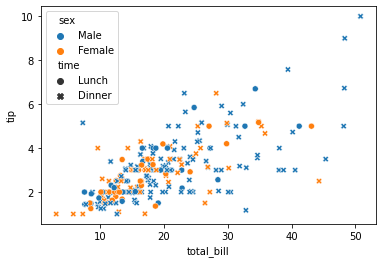

In [106]:
sns.scatterplot(x ="total_bill", y = "tip", style = "time" , hue = "sex", data = df);

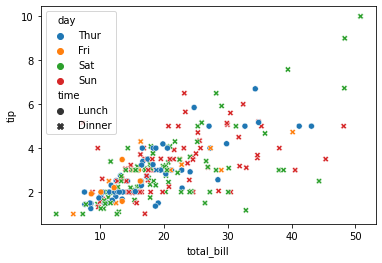

In [107]:
sns.scatterplot(x ="total_bill", y = "tip", style = "time" , hue = "day", data = df);

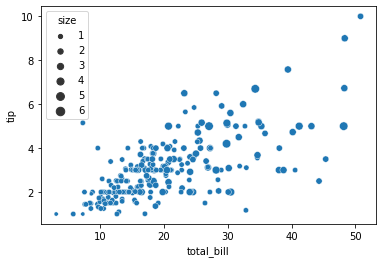

In [108]:
sns.scatterplot(x ="total_bill", y = "tip", size  = "size", data = df);

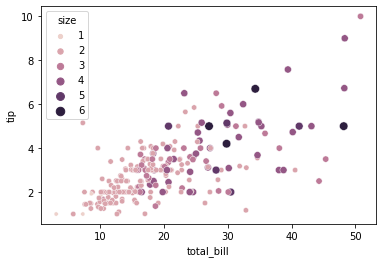

In [109]:
sns.scatterplot(x ="total_bill", y = "tip", size  = "size", hue = "size", data = df);

## Dogrusal İlişkinin Gösterilmesi

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt 

* **lmplot** = lineer model (dogrusal bir çizgi olusturacagımız için bu fonksiyon kullanılır)

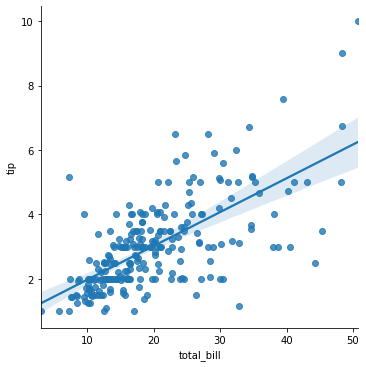

In [111]:
sns.lmplot(x = "total_bill", y = "tip", data = df);

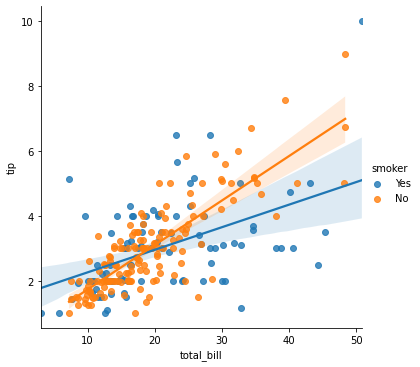

In [112]:
sns.lmplot(x = "total_bill", y = "tip", hue ="smoker", data = df);

* **col** argumanı verilen kategorik değişkene gore ıkıye boler

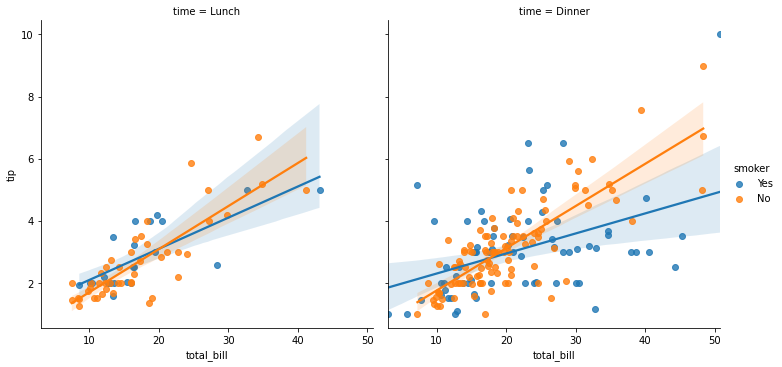

In [113]:
sns.lmplot(x = "total_bill", y = "tip", hue ="smoker", col = "time", data = df);

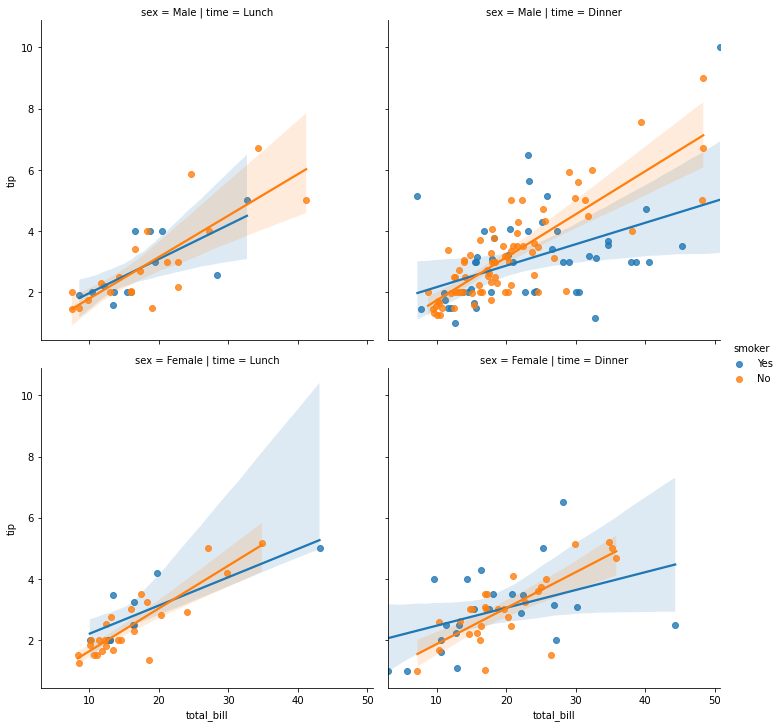

In [114]:
sns.lmplot(x = "total_bill", y = "tip", hue ="smoker", col = "time", row = "sex", data = df);

## Scatterplot Matrisi

In [115]:
import seaborn as sns
iris = sns.load_dataset("iris")
df = iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [116]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [117]:
df.shape

(150, 5)

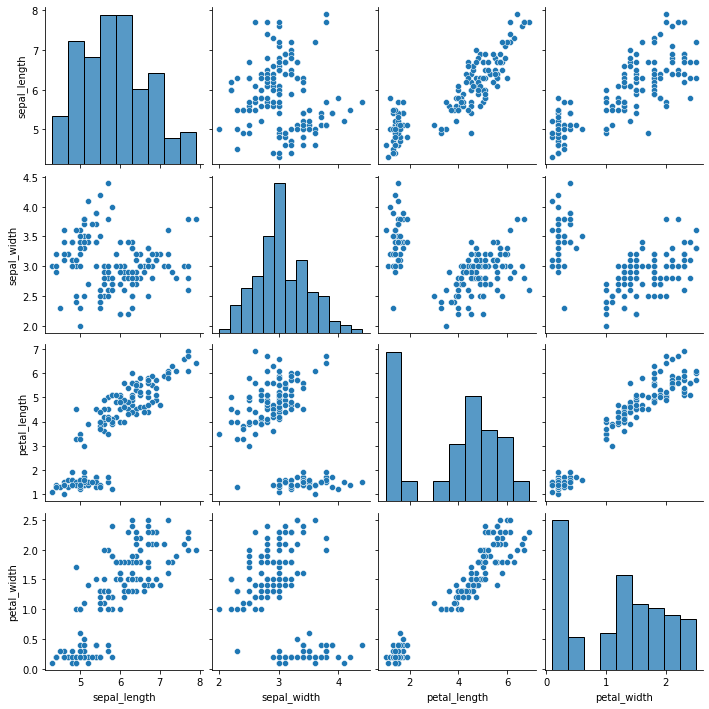

In [118]:
sns.pairplot(df);

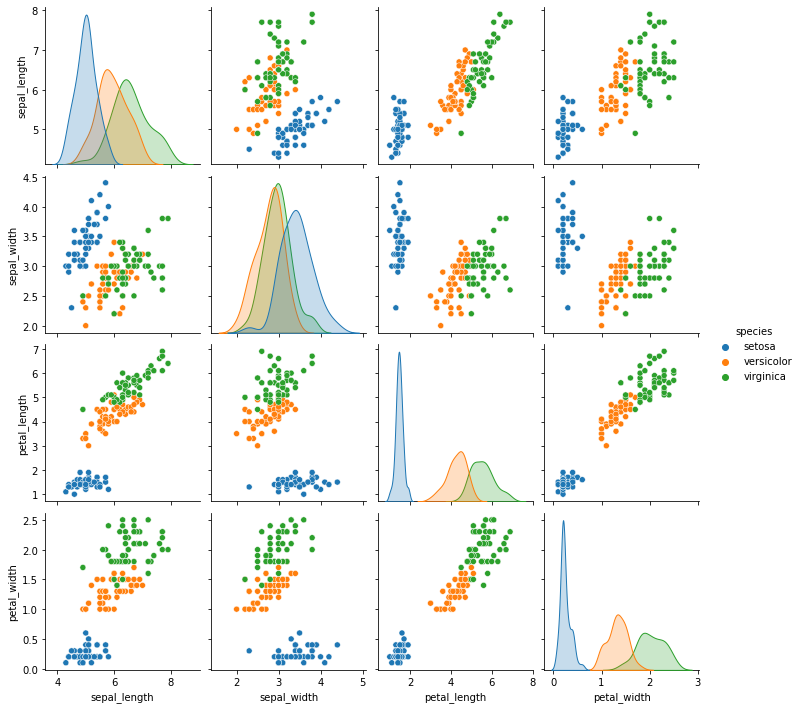

In [119]:
sns.pairplot(df, hue = "species" );

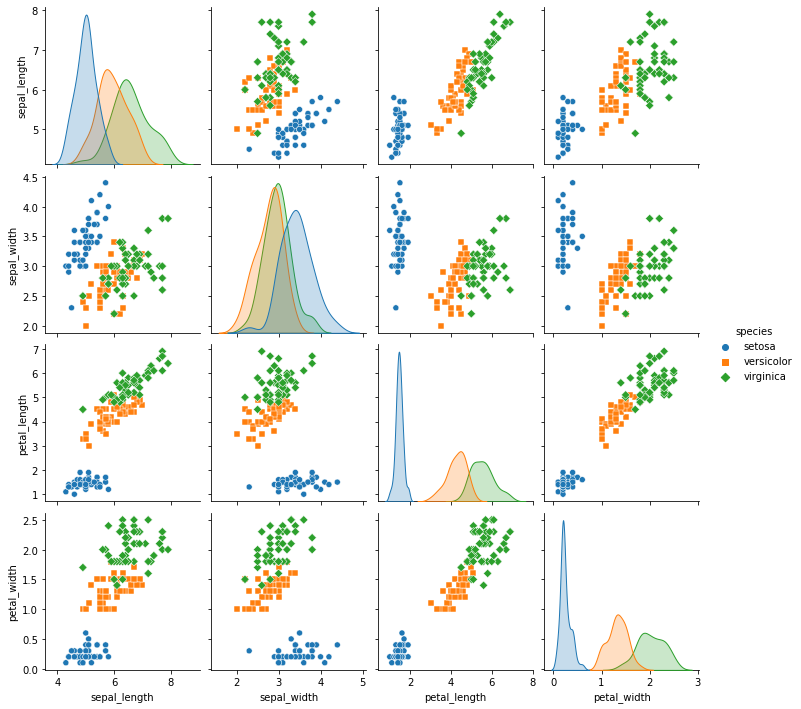

In [120]:
sns.pairplot(df, hue = "species", markers = ["o", "s", "D"] );

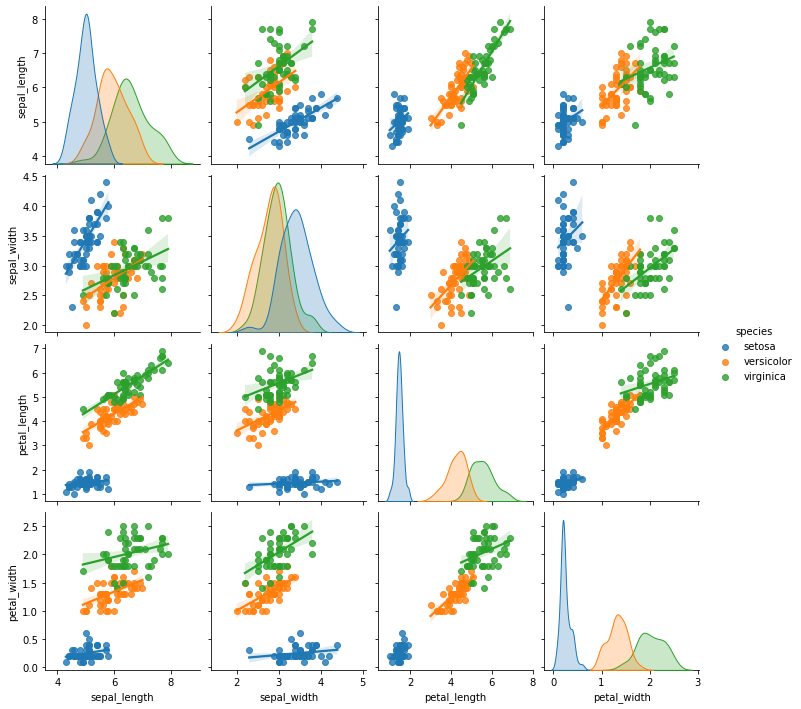

In [121]:
sns.pairplot(df, hue = "species" , kind = "reg" );

## Heat Map (Isı Haritası)

In [130]:
import pandas as pd
import seaborn as sns
flights = sns.load_dataset("flights")
df = flights.copy()
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [131]:
df.shape

(144, 3)

In [132]:
df["passengers"].describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: passengers, dtype: float64

In [133]:
df = df.pivot("month", "year", "passengers");

In [134]:
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


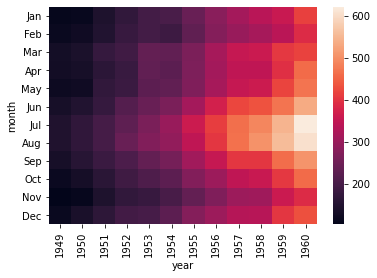

In [135]:
sns.heatmap(df);

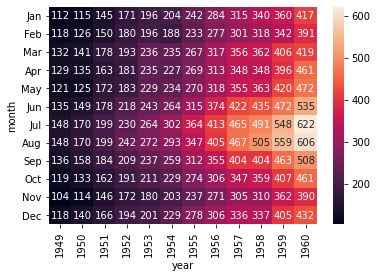

In [136]:
sns.heatmap(df, annot = True, fmt = "d");

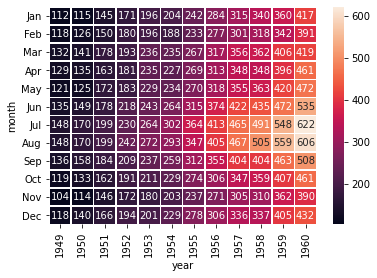

In [137]:
sns.heatmap(df, annot = True, fmt = "d", linewidths = .5);

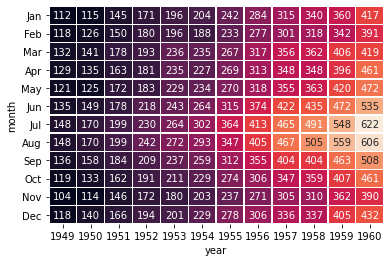

In [138]:
sns.heatmap(df, annot = True, fmt = "d", linewidths = .5, cbar = False);

## Çizgi Grafik

In [139]:
import seaborn as sns
fmri = sns.load_dataset("fmri")
df = fmri.copy()
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [140]:
df.shape

(1064, 5)

In [141]:
df["timepoint"].describe()

count    1064.000000
mean        9.000000
std         5.479801
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        18.000000
Name: timepoint, dtype: float64

In [142]:
df["signal"].describe()

count    1064.000000
mean        0.003540
std         0.093930
min        -0.255486
25%        -0.046070
50%        -0.013653
75%         0.024293
max         0.564985
Name: signal, dtype: float64

* Her bir zaman noktasında eşit sınyal mı var ?

In [143]:
df.groupby("timepoint")["signal"].count()

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

In [145]:
df.groupby("timepoint")["signal"].describe()

,count,mean,std,min,25%,50%,75%,max
timepoint,,,,,,,,
0,56.0,-0.016662,0.028326,-0.064454,-0.039169,-0.018382,0.003539,0.074399
1,56.0,-0.025002,0.030641,-0.082174,-0.046299,-0.024533,-0.005388,0.063558
2,56.0,-0.012873,0.035440,-0.110565,-0.034944,-0.013183,0.009318,0.077277
3,56.0,0.034446,0.058260,-0.089708,-0.001157,0.028430,0.061840,0.185581
4,56.0,0.098194,0.092838,-0.046347,0.030912,0.070166,0.144911,0.346775
5,56.0,0.137725,0.123353,-0.017946,0.042762,0.096535,0.211638,0.476055
6,56.0,0.127515,0.137332,-0.054405,0.022409,0.068850,0.218919,0.564985
7,56.0,0.075660,0.129704,-0.108222,-0.016252,0.032486,0.144781,0.494787
8,56.0,0.013420,0.104216,-0.181241,-0.049453,-0.012834,0.030396,0.337143


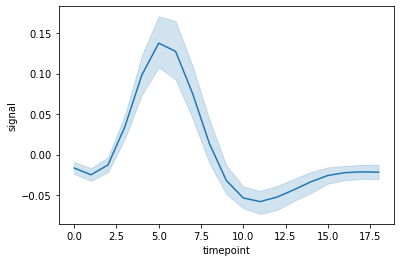

In [146]:
sns.lineplot(x = "timepoint", y = "signal", data = df);

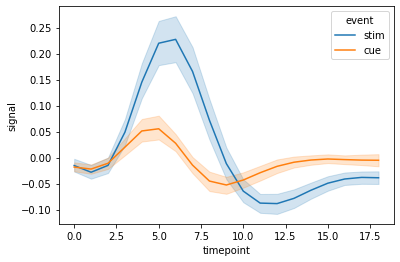

In [147]:
sns.lineplot(x = "timepoint", y = "signal", hue = "event", data = df);

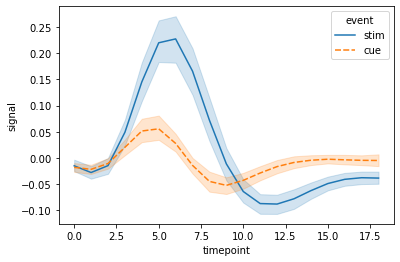

In [148]:
sns.lineplot(x = "timepoint", y = "signal", hue = "event", style = "event", data = df);

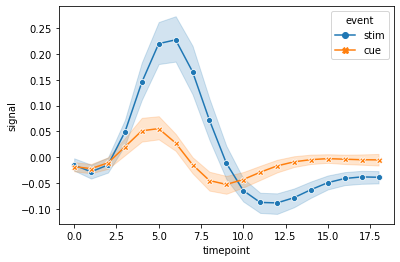

In [149]:
sns.lineplot(x = "timepoint",
             y = "signal", 
             hue = "event", 
             style = "event", 
             markers = True, dashes = False, data = df);

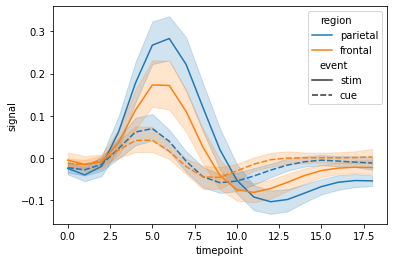

In [150]:
sns.lineplot(x = "timepoint",
             y = "signal", 
             hue = "region", 
             style = "event", 
             data = df);